원그래프/파이도(PIE CHART)

## 1. 기본 파이차트 (Matplotlib)

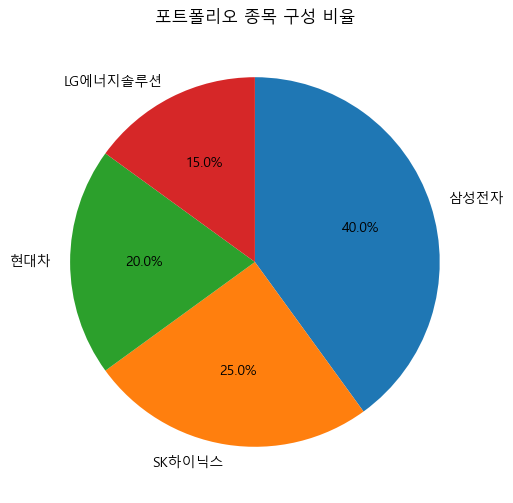

In [3]:
import matplotlib.pyplot as plt

#wndows에서 한글이 잘 보이는 기본 폰트 설정 (예: 'Malgun Gothic')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 음수 부호 깨짐 방지

# 데이터
labels = ['삼성전자', 'SK하이닉스', '현대차', 'LG에너지솔루션']
values = [40, 25, 20, 15]

# 파이 차트
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)

plt.title("포트폴리오 종목 구성 비율")
plt.show()


### 시가총액 비중 (기본)

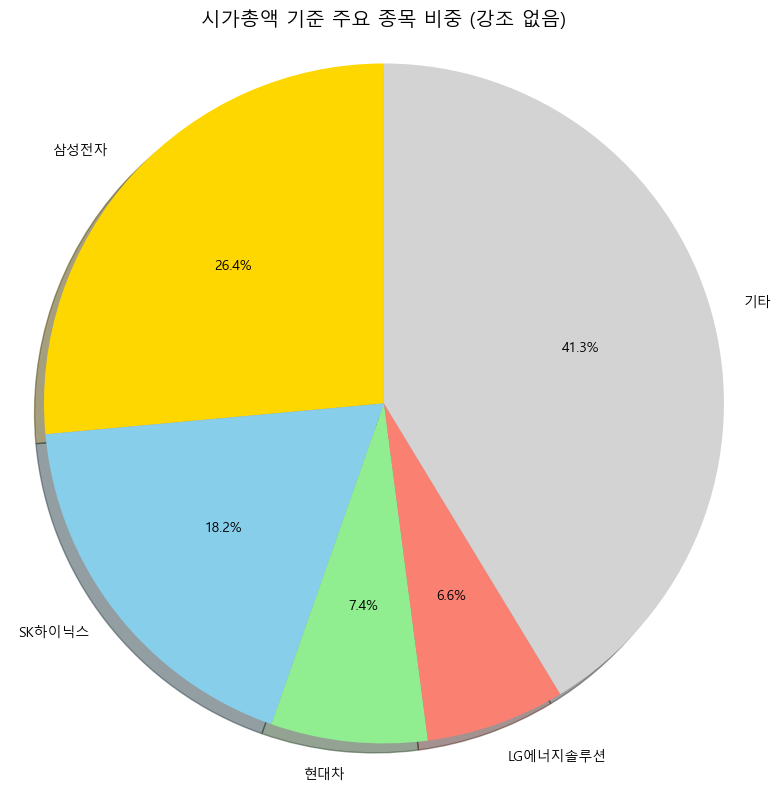

In [11]:
import matplotlib.pyplot as plt

# ▶️ 데이터
labels = ['삼성전자', 'SK하이닉스', '현대차', 'LG에너지솔루션', '기타']
market_caps = [320, 220, 90, 80, 500]  # 단위: 조 원 (예시)

# ▶️ 파이 차트 그리기 (explode 없이)
plt.figure(figsize=(8, 8))
plt.pie(
    market_caps,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=['gold', 'skyblue', 'lightgreen', 'salmon', 'lightgray']
)

# ▶️ 꾸미기
plt.title("시가총액 기준 주요 종목 비중 ", fontsize=14)
plt.axis('equal')  # 원형 유지
plt.tight_layout()
plt.show()


###  시가총액 비중  (강조 추가)

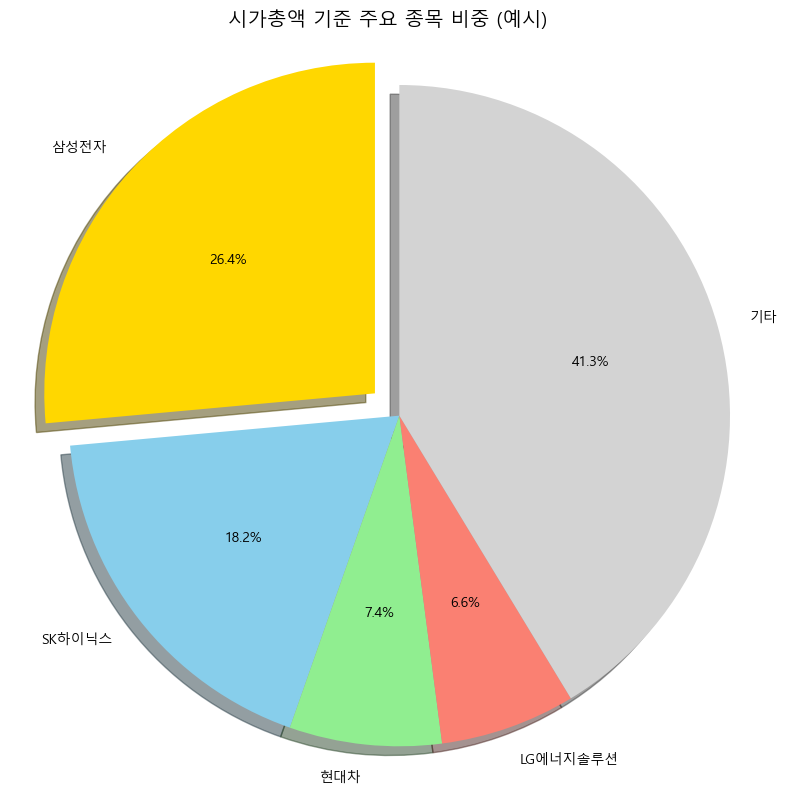

In [10]:
import matplotlib.pyplot as plt

# ▶️ 데이터 입력
labels = ['삼성전자', 'SK하이닉스', '현대차', 'LG에너지솔루션', '기타']
market_caps = [320, 220, 90, 80, 500]  # 단위: 조 원 (예시)

# ▶️ 강조할 항목 설정 (삼성전자만 살짝 분리)
explode = [0.1, 0, 0, 0, 0]

# ▶️ 파이 차트 그리기
plt.figure(figsize=(8, 8))
plt.pie(
    market_caps,
    labels=labels,
    explode=explode,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=['gold', 'skyblue', 'lightgreen', 'salmon', 'lightgray']
)

# ▶️ 제목 및 표시
plt.title("시가총액 기준 주요 종목 비중 (예시)", fontsize=14)
plt.axis('equal')  # 원형 유지
plt.tight_layout()
plt.show()


### 1-2 Pandas 기반 파이차트

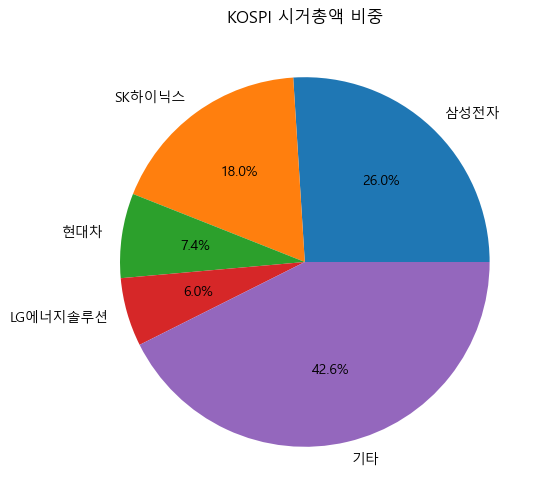

In [13]:
import pandas as pd

# 예시 데이터프레임
df = pd.DataFrame({
    '종목': ['삼성전자', 'SK하이닉스', '현대차', 'LG에너지솔루션', '기타'],
    '비중': [0.26, 0.18, 0.074, 0.06, 0.426]
})

# 시각화
df.set_index('종목').plot.pie(y='비중', autopct='%.1f%%', figsize=(6, 6), legend=False)
plt.title("KOSPI 시거총액 비중")
plt.ylabel("")  # Y축 텍스트 제거
plt.show()


## 2. 도넛 차트 (시가총액 비중)

In [ ]:
# 션	설명
# wedgeprops={'width': 0.4}	도넛 두께 (0.4 = 중간)
# plt.text(0, 0, ...)	가운데 텍스트 표시
# shadow=True	그림자 효과로 입체감

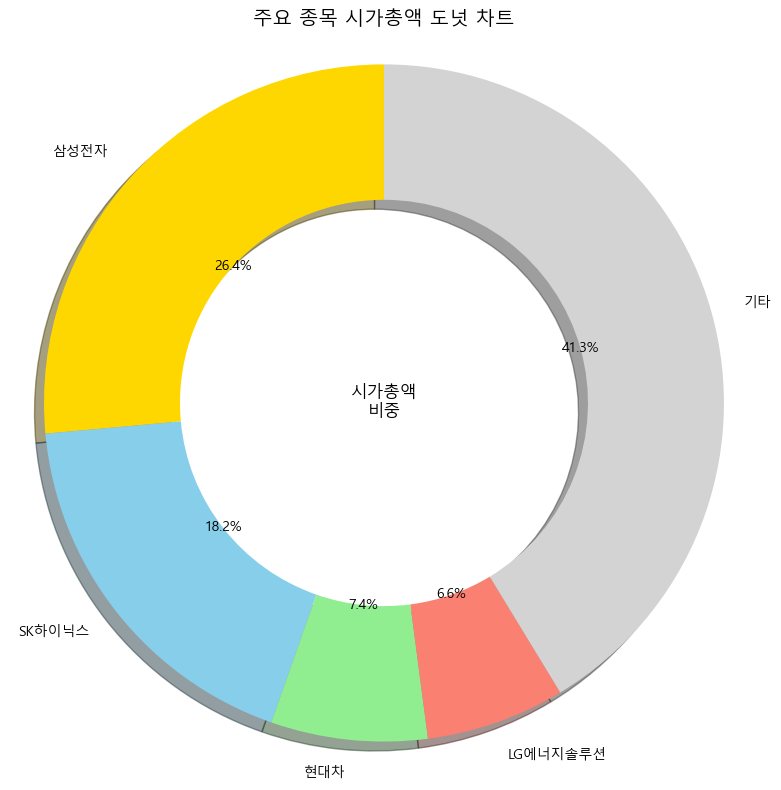

In [14]:
import matplotlib.pyplot as plt

# ▶️ 데이터
labels = ['삼성전자', 'SK하이닉스', '현대차', 'LG에너지솔루션', '기타']
market_caps = [320, 220, 90, 80, 500]  # 단위: 조 원 (예시)

# ▶️ 도넛 차트 그리기 (wedgeprops 로 가운데 비우기)
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    market_caps,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=['gold', 'skyblue', 'lightgreen', 'salmon', 'lightgray'],
    wedgeprops={'width': 0.4}  # 핵심: 도넛 두께 조절
)

# ▶️ 가운데 텍스트 추가 (선택)
plt.text(0, 0, "시가총액\n비중", ha='center', va='center', fontsize=12)

# ▶️ 그래프 꾸미기
plt.title("주요 종목 시가총액 도넛 차트", fontsize=14)
plt.axis('equal')  # 원형 유지
plt.tight_layout()
plt.show()


In [ ]:
## 2023년 월별 시가총액 비중 비교 (도넛 차트)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pykrx import stock
from pandas.tseries.offsets import BDay

# 종목 코드
tickers = {
    "005930": "삼성전자",
    "000660": "SK하이닉스",
    "005380": "현대차",
    "373220": "LG에너지솔루션"
}

# 휴장일 대응: 가장 가까운 영업일 찾기
def get_nearest_business_day(date_str):
    date = pd.to_datetime(date_str)
    while True:
        try:
            mcap_df = stock.get_market_cap_by_ticker(date.strftime('%Y%m%d'))
            if '시가총액' in mcap_df.columns and not mcap_df.empty:
                return date.strftime('%Y%m%d')
        except:
            pass
        date -= BDay(1)  # 하루 전으로 이동

#  분석 대상 월
months = pd.date_range("2023-01-01", "2023-06-01", freq="MS")

# 데이터 수집
monthly_caps = []

for dt in months:
    try:
        date_str = get_nearest_business_day(dt.strftime("%Y%m%d"))
        mcap_df = stock.get_market_cap_by_ticker(date_str)

        row = {}
        total = mcap_df['시가총액'].sum()
        selected_sum = 0

        for code, name in tickers.items():
            cap = mcap_df.loc[code, '시가총액'] if code in mcap_df.index else 0
            row[name] = cap
            selected_sum += cap

        row['기타'] = total - selected_sum
        row['월'] = dt.strftime("%Y-%m")
        monthly_caps.append(row)

    except Exception as e:
        print(f"{dt.strftime('%Y-%m-%d')} 오류 발생: {e}")
        continue

#  데이터프레임 정리
df = pd.DataFrame(monthly_caps).set_index("월")

#  도넛 차트 시각화
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
colors = ['gold', 'skyblue', 'lightgreen', 'salmon', 'lightgray']

for ax, (month, row) in zip(axes.flatten(), df.iterrows()):
    ax.pie(
        row.values,
        labels=row.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'width': 0.4}
    )
    ax.set_title(f"{month}")
    ax.axis('equal')
    ax.text(0, 0, month, ha='center', va='center', fontsize=10)

plt.suptitle("2023년 월별 시가총액 비중 비교 (도넛 차트)", fontsize=16)
plt.tight_layout()
plt.show()
